# Temperature history - world cities

This script assesses the yearly temperature average measured in 1000 cities across the world. The data is sourced from a Copernicus dataset, where years range from 1980 to 2020 and the 2020 data only reaches September. Thus, some analysis will be done until 2019 only.

**Goals:** Primarily we want to see how the temperature of the cities changed from 1980 to now. We will firstly do this by calculating the difference between the average yeary temperatures of 1980 and 2019. This serves as an indicator of the changing climate. We will plot this difference on a world map.\
Then the data will be split into continents. Lastly we will collect the cities with the biggest and smallest change in temperature for each continent.

**Data source:** [Kaggle](https://www.kaggle.com/datasets/hansukyang/temperature-history-of-1000-cities-1980-to-2020)

**Note:** This script is made in Geopandas, which was installed following the process described in [this](https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b) Medium article. This package allows geospatial visualizations, but unfortunatelly does not allow use of the Seaborn library.

## Table of Contents
* [Geospatial visualizations](#chapter1)
    * [Importing and arranging the dataset](#section_1_1)
    * [Plotting the map](#section_1_2)
* [Continents](#chapter2)
    * [Dataset](#section_2_1)
    * [Functions](#section_2_2)
    * [Europe](#section_2_3)
        * [Heatmap](#sub_section_2_3_1)
        * [Temperature difference](#sub_section_2_3_2)
    * [Asia](#section_2_4)
        * [Heatmap](#sub_section_2_4_1)
            * [Cities starting with A](#subsub_section_2_4_1_1)
            * [Coldest cities (<10°C)](#subsub_section_2_4_1_2)
            * [Hottest cities (>27°C)](#subsub_section_2_4_1_3)
        * [Temperature difference](#sub_section_2_4_2)
    * [Africa](#section_2_5)
        * [Heatmap](#sub_section_2_5_1)
        * [Temperature difference](#sub_section_2_5_2)
    * [North America](#section_2_6)
        * [Heatmap](#sub_section_2_6_1)
        * [Temperature difference](#sub_section_2_6_2)
    * [South America](#section_2_7)
        * [Heatmap](#sub_section_2_7_1)
        * [Temperature difference](#sub_section_2_7_2)
    * [Oceania](#section_2_8)
        * [Heatmap](#sub_section_2_8_1)
        * [Temperature difference](#sub_section_2_8_2)
    * [Antarctica](#section_2_9)
    * [Plotting the biggest and smallest temperature difference for every continent](#section_2_10)
    

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors #colormaps
from matplotlib import cm #colormaps
import geopandas as gpd

# Geospatial visualizations <a class="anchor" id="chapter1"></a>

## Importing and arranging the dataset <a class="anchor" id="section_1_1"></a>

In [2]:
df = pd.read_csv('Kaggle/daily_temperature_1000_cities_1980_2020.csv', header=1, skiprows=[2,5,6,7,8,9,10,11,12])
df.rename(columns={'city':'date'}, inplace=True) #rename header name
df.head(5) 

,date,Tokyo,New York,Mexico City,Mumbai,São Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilāspur,Sargodha,Leipzig,Tinnevelly,Cancún,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Göteborg
0,lat,35.6850,40.6943,19.4424,19.017,-23.5587,28.67,31.2165,22.4950,34.1139,...,22.0904,32.0854,51.3354,8.7304,21.17,32.40,53.750,35.54,25.88,57.75
1,lng,139.7514,-73.9249,-99.1310,72.857,-46.6250,77.23,121.4365,88.3247,-118.4068,...,82.1600,72.6750,12.4100,77.6900,-86.83,119.43,87.115,35.78,-97.50,12.00
2,1980-01-01,4.1600,1.4800,11.3500,23.400,17.8600,13.74,9.1000,20.4700,14.2400,...,22.1400,11.5400,0.6700,24.0500,21.21,3.71,-13.880,11.68,17.67,-0.82
3,1980-01-02,4.0600,1.0000,10.0100,22.670,18.6500,12.85,6.4000,19.3700,13.7700,...,22.2600,11.1300,-0.8800,24.1900,23.29,3.26,-15.050,13.71,17.70,-5.25
4,1980-01-03,7.1200,-3.2300,9.6700,22.300,18.4200,10.50,5.4300,18.7100,12.0800,...,21.0900,10.2800,-4.3000,24.3900,24.04,2.17,-14.190,13.00,11.19,-13.00


In [3]:
df.dtypes

date                  object
Tokyo                float64
New York             float64
Mexico City          float64
Mumbai               float64
                      ...   
Yangzhou             float64
Novokuznetsk         float64
Latakia              float64
Heroica Matamoros    float64
Göteborg             float64
Length: 1001, dtype: object

In [5]:
#new latitude, longitude dataframes

df_lat = pd.DataFrame(df.iloc[0,1:]).reset_index(drop=True) #latitude dataframe
df_lng = pd.DataFrame(df.iloc[1,1:]).reset_index(drop=True) #longitude dataframe

#edit lat, lng dataframes
df_lat.rename(columns={0:'latitude'}, inplace=True)
df_lng.rename(columns={1:'longitude'}, inplace=True)
df_xy = pd.concat([df_lng, df_lat], axis=1) #combine lat, lng dataframes into one 

#convert data types
pd.options.mode.chained_assignment = None #to not get a warning

df_xy['longitude'] = pd.to_numeric(df_xy['longitude'], errors='coerce')
df_xy['latitude'] = pd.to_numeric(df_xy['latitude'], errors='coerce')

#print(df_xy.dtypes)

#delete null rows
df_xy.dropna()
df_xy = df_xy.reset_index(drop=True)

In [6]:
#dataframe with no lat, lng data
df_new = df.iloc[2:,:] # dataframe without latitude, longitude

#edit data
df_new['date'] = pd.to_datetime(df_new['date'], errors='coerce') # convert data type
print(df_new.dtypes)
df_new.dropna() #delete null rows

df_new=df_new.reset_index(drop=True)

df_new.head(5)

date                 datetime64[ns]
Tokyo                       float64
New York                    float64
Mexico City                 float64
Mumbai                      float64
                          ...      
Yangzhou                    float64
Novokuznetsk                float64
Latakia                     float64
Heroica Matamoros           float64
Göteborg                    float64
Length: 1001, dtype: object


,date,Tokyo,New York,Mexico City,Mumbai,São Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilāspur,Sargodha,Leipzig,Tinnevelly,Cancún,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Göteborg
0,1980-01-01,4.16,1.48,11.35,23.40,17.86,13.74,9.10,20.47,14.24,...,22.14,11.54,0.67,24.05,21.21,3.71,-13.88,11.68,17.67,-0.82
1,1980-01-02,4.06,1.00,10.01,22.67,18.65,12.85,6.40,19.37,13.77,...,22.26,11.13,-0.88,24.19,23.29,3.26,-15.05,13.71,17.70,-5.25
2,1980-01-03,7.12,-3.23,9.67,22.30,18.42,10.50,5.43,18.71,12.08,...,21.09,10.28,-4.30,24.39,24.04,2.17,-14.19,13.00,11.19,-13.00
3,1980-01-04,9.23,-1.81,10.12,23.40,19.21,10.87,2.29,18.76,11.19,...,20.39,10.98,-6.75,24.12,21.49,-0.95,-15.09,12.67,14.22,-11.75
4,1980-01-05,3.20,-4.31,10.81,23.98,21.34,11.03,2.40,18.62,12.78,...,19.51,11.27,0.10,23.86,21.20,-0.66,-13.85,10.09,18.30,-2.72


In [7]:
#list of city names

city = list(df_new.keys())
city = city[1:]

In [8]:
#group temperatures by year for each city. calculate average yearly temp. create new list.

avg = []

for i in range(len(city)):
    a = df_new.groupby(df_new.date.dt.year)[city[i]].mean().reset_index(drop=True)
    aavg = list(a)
    avg.append(a)
    
#convert list to dataframe
df_avg = pd.DataFrame(avg)

In [9]:
#difference between 2019 temp and 1980 temp

delta = df_avg.iloc[:,-2]-df_avg.iloc[:,0] #list
df_z = pd.DataFrame({'delta' : delta}).reset_index(drop=True) #convert to dataframe, each row is one city

In [10]:
#new dataframe: longitude, latitude, delta
dff = pd.concat([df_xy,df_z],axis=1) 

## Plotting the map <a class="anchor" id="section_1_2"></a>

In [11]:
# From GeoPandas, world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Anaconda3\envs\geo_env\Lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


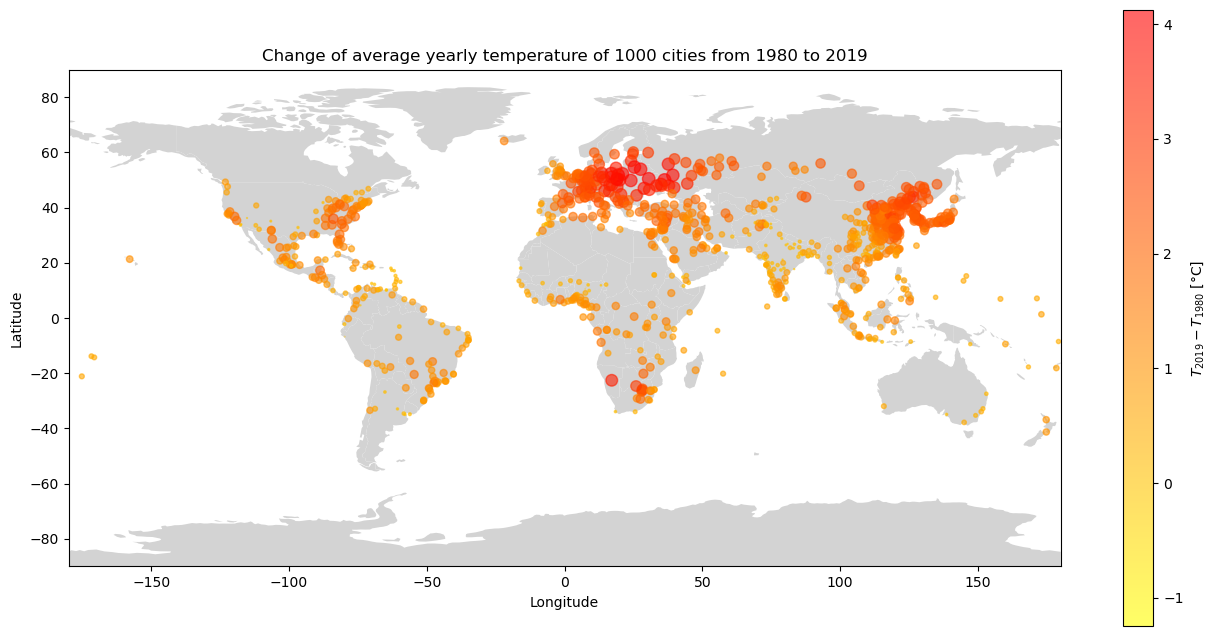

In [12]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 8))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = dff['longitude']
y = dff['latitude']
z = dff['delta']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, cmap='autumn_r')
# s = shape; c=color; alpha=transparency parameter; vmin, vmax=data range; cmap=color map
plt.colorbar(label='$T_{2019} - T_{1980}$ [°C] ')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Change of average yearly temperature of 1000 cities from 1980 to 2019")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

fig.savefig('Temp_history_geo.png')

# Continents <a class="anchor" id="chapter2"></a>

## Dataset <a class="anchor" id="section_2_1"></a>

In [13]:
geo = pd.read_csv('Kaggle/daily_temperature_1000_cities_1980_2020.csv', header=1, skiprows = 1)
geo.rename(columns={'city_ascii':'date'}, inplace=True) #rename header name
geo.head(20)

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\2752810844.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,date,Tokyo,New York,Mexico City,Mumbai,Sao Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilaspur,Sargodha,Leipzig,Tinnevelly,Cancun,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Goteborg
0,lat,35.685,40.6943,19.4424,19.017,-23.5587,28.67,31.2165,22.495,34.1139,...,22.0904,32.0854,51.3354,8.7304,21.17,32.4,53.75,35.54,25.88,57.75
1,lng,139.7514,-73.9249,-99.131,72.857,-46.625,77.23,121.4365,88.3247,-118.4068,...,82.16,72.675,12.41,77.69,-86.83,119.43,87.115,35.78,-97.5,12.0
2,country,Japan,United States,Mexico,India,Brazil,India,China,India,United States,...,India,Pakistan,Germany,India,Mexico,China,Russia,Syria,Mexico,Sweden
3,iso2,JP,US,MX,IN,BR,IN,CN,IN,US,...,IN,PK,DE,IN,MX,CN,RU,SY,MX,SE
4,iso3,JPN,USA,MEX,IND,BRA,IND,CHN,IND,USA,...,IND,PAK,DEU,IND,MEX,CHN,RUS,SYR,MEX,SWE
5,admin_name,Tōkyō,New York,Ciudad de México,Mahārāshtra,São Paulo,Delhi,Shanghai,West Bengal,California,...,Chhattīsgarh,Punjab,Saxony,Tamil Nādu,Quintana Roo,Jiangsu,Kemerovskaya Oblast’,Al Lādhiqīyah,Tamaulipas,Västra Götaland
6,capital,primary,NaN,primary,admin,admin,admin,admin,admin,NaN,...,NaN,minor,minor,NaN,minor,NaN,NaN,admin,minor,admin
7,population,35676000.0,19354922.0,19028000.0,18978000.0,18845000.0,15926000.0,14987000.0,14787000.0,12815475.0,...,543454.0,542603.0,542529.0,542200.0,542043.0,539715.0,539616.0,539147.0,538785.0,537797.0
8,id,1392685764,1840034016,1484247881,1356226629,1076532519,1356872604,1156073548,1356060520,1840020491,...,1356820491,1586696588,1276563678,1356037155,1484010310,1156818601,1643628717,1760555544,1484614906,1752059374
9,datetime,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999


## Functions <a class="anchor" id="section_2_2"></a>

In [15]:
def extract_continent(data, iso_list):
    """
    Arguments:
        data = initial dataframe
        iso_list = list of countries' ISO codes
    Function extracts the desired continent based on the city's ISO code.
    """
    continent = data[data.columns[data.iloc[4].isin(iso_list)]]
    continent.insert(0,'date', data['date'])
    continent = continent.iloc[10:,:].reset_index(drop=True) #dont use this line outside of the function
    continent['date'] = pd.to_datetime(continent['date'])
    continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')
    print(continent.dtypes)
    
    return continent   

In [17]:
def yearly_mean(continent):
    """
    Function calculates yearly temperature averages for the given continent. Years range from 1980 to 2020.
    """
    cities = continent.columns.tolist()[1:]
    continent = continent.groupby(continent.date.dt.year)[cities].mean().reset_index(drop=True)
    return continent    

In [20]:
years = list(range(1980, 2020,1))
years_5 = list(range(1980,2020,5))

In [25]:
def plot_heatmap(continent_yearly_mean, continent):
    """
    Function plots a heatmap of yearly temperature averages for the desired continent.
    """
    plt.figure(figsize=(30,8))
    ax = plt.subplot()
    plt.imshow(continent_yearly_mean.iloc[:-1], cmap = 'RdYlBu_r') #drop 2020
    cbar = plt.colorbar()
    cbar.set_label('Average temperature [°C]')
    ax.set_xticks(range(len(continent_yearly_mean.columns)))
    ax.set_xticklabels(continent_yearly_mean.columns, rotation=90)
    ax.set_yticks(range(len(years)))
    ax.set_yticklabels(years)
    plt.xlabel('City')
    plt.ylabel('Year')
    plt.title('Heatmap of cities in {}'.format(continent))
    plt.show()

In [27]:
def calculate_delta(continent_yearly_mean):
    """
    Function calculates the difference between the 2019 and 1980 temperature. Adds a column to the dataset of the absolute difference values.
    """
    no_2020 = continent_yearly_mean.iloc[:-1]
    continent_delta = pd.DataFrame(no_2020.iloc[-1]-no_2020.iloc[0], columns = ['delta'])
    continent_delta.reset_index(inplace=True)
    continent_delta = continent_delta.rename(columns = {'index':'city'})
    continent_delta['abs_delta'] = abs(continent_delta['delta'])
    return continent_delta

In [32]:
def min_max(continent_delta):
    """
    Function prints the cities with the smallest and largest absolute temperature difference, and said differences.
    """
    min_index = continent_delta['abs_delta'].idxmin()
    max_index = continent_delta['abs_delta'].idxmax()
    min_city = continent_delta.iloc[min_index][0]
    min_delta = continent_delta.iloc[min_index][2]
    max_city = continent_delta.iloc[max_index][0]
    max_delta = continent_delta.iloc[max_index][2]
    return print('City with the smallest change in temperature is {}.\n'.format(min_city),
                'Min absolute change in temperature: {}°C.\n'.format(round(min_delta,2)),
                 'Relative change in temperature: {}°C.\n'.format(round(continent_delta.iloc[min_index][1],2)),
                'City with the bigest change in temperature is {}.\n'.format(max_city),
                'Max asolute change in temperature: {}°C.\n'.format(round(max_delta,2)),
                'Relative change in temperature: {}°C.'.format(round(continent_delta.iloc[max_index][1],2)))

## Europe <a class="anchor" id="section_2_3"></a>

ISO3 codes of countries or teritories on the European continent. Codes were sourced from: https://statisticstimes.com/geography/countries-by-continents.php

In [14]:
Europe = ['ALA', 'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB',
         'GRC', 'GGY', 'VAT', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MCO', 'MNE', 'NLD', 
         'MKD', 'NOR', 'POL', 'PRT', 'MDA', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SJM', 'SWE', 'CHE', 'UKR', 'GBR']

In [16]:
eu = extract_continent(geo, Europe) 
eu.head()

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


date            datetime64[ns]
Moscow                 float64
Paris                  float64
London                 float64
Madrid                 float64
                     ...      
Orenburg               float64
Malaga                 float64
Leipzig                float64
Novokuznetsk           float64
Goteborg               float64
Length: 147, dtype: object


,date,Moscow,Paris,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
0,1980-01-01,-7.05,0.30,-1.68,10.76,8.87,-4.94,0.19,5.30,10.24,...,-12.27,-18.46,-26.46,2.34,-1.12,-12.15,12.98,0.67,-13.88,-0.82
1,1980-01-02,-3.54,-0.27,-1.99,7.40,9.22,-3.85,-0.61,5.09,10.42,...,-2.80,-24.51,-19.68,4.47,-2.54,-14.52,11.78,-0.88,-15.05,-5.25
2,1980-01-03,-3.73,-0.31,2.18,3.87,7.38,-3.05,-3.59,2.95,10.45,...,-7.16,-26.84,-16.96,3.89,5.02,-16.21,10.66,-4.30,-14.19,-13.00
3,1980-01-04,-5.45,4.58,6.96,3.65,7.78,-4.38,-6.94,2.07,5.18,...,-15.57,-20.60,-25.85,4.73,7.51,-15.08,10.55,-6.75,-15.09,-11.75
4,1980-01-05,-6.30,4.50,4.14,4.20,8.29,-5.97,-3.10,4.19,3.00,...,-13.05,-22.38,-26.15,4.69,5.69,-13.23,10.87,0.10,-13.85,-2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14879,2020-09-26,14.51,11.02,9.75,15.27,18.22,15.23,10.24,15.08,24.83,...,16.43,8.03,12.55,19.50,9.45,9.54,20.04,8.67,5.72,14.24
14880,2020-09-27,13.24,11.91,11.44,16.92,17.24,14.50,9.66,13.66,22.61,...,16.61,7.00,11.47,17.93,9.89,10.34,20.57,9.55,4.30,15.58
14881,2020-09-28,10.31,12.73,12.64,15.10,18.28,11.90,12.76,13.79,23.81,...,16.85,5.96,12.94,17.49,11.05,11.46,19.64,11.74,5.60,14.36
14882,2020-09-29,11.94,15.32,14.38,17.40,19.30,11.29,13.17,15.56,23.67,...,13.85,7.93,10.45,17.12,13.63,11.97,20.19,12.73,5.74,12.49


In [18]:
eu_yearly_mean = yearly_mean(eu)
eu_yearly_mean

,Moscow,Paris,London,Madrid,Barcelona,Saint Petersburg,Berlin,Rome,Athens,Milan,...,Vladivostok,Irkutsk,Khabarovsk,Makhachkala,Bristol,Orenburg,Malaga,Leipzig,Novokuznetsk,Goteborg
0,3.468579,9.758142,9.561448,14.128115,14.711967,3.423197,7.848852,14.255710,17.044645,12.425000,...,4.700874,-0.765191,1.070601,11.623798,9.600082,3.941749,16.344617,8.149645,1.403115,6.435902
1,6.057096,10.476356,9.572438,14.670027,15.427041,4.234658,8.865808,14.688329,17.519945,12.561452,...,5.039534,-0.207425,0.733973,12.625288,9.563863,5.977068,16.578110,8.946795,1.932110,6.406658
2,4.849534,11.052521,10.256411,14.696274,15.762000,4.233863,9.615233,15.589671,17.051699,13.124493,...,5.630548,0.139726,1.980110,11.151890,10.298000,5.274986,16.445890,10.012082,2.890575,7.392493
3,5.753288,10.877123,10.419068,14.643890,15.625342,5.156767,9.850274,15.120712,16.807562,13.041068,...,5.161068,0.525260,1.386301,11.868575,10.410603,6.258932,16.901589,9.931068,3.245781,7.912630
4,4.543607,10.262268,10.029809,13.670000,14.778142,4.824617,8.577623,14.489344,17.184044,12.139836,...,4.680519,-1.440301,1.320164,11.363087,10.204454,4.417923,16.000956,8.628989,-0.258470,7.622568
5,3.474082,9.555260,9.227753,14.860027,15.198603,2.532603,8.147123,15.333479,17.483562,12.566329,...,5.016164,-0.998767,1.663178,11.338603,9.165342,4.425123,16.693973,8.221836,0.913479,5.390411
6,4.284274,9.914685,9.171836,14.342493,15.435315,3.821562,8.452110,15.284384,17.574192,12.712411,...,4.493671,0.408712,1.605205,11.845041,8.976849,4.024548,16.430767,8.623699,1.340877,6.104904
7,2.557781,9.753616,9.475370,14.965068,15.560411,2.146110,7.650000,15.514384,17.173342,12.662192,...,4.692740,-0.520904,0.747370,11.127973,9.511096,3.247836,16.900411,7.844795,1.334137,5.296384
8,5.083880,11.039536,10.091612,14.304863,15.740464,4.785956,9.646120,15.579754,17.491175,13.218934,...,5.448033,0.285273,2.333251,11.770082,10.061311,4.882131,16.770820,9.852186,1.940191,7.634454
9,6.814055,11.461233,11.046411,15.439671,16.072384,6.439534,10.357397,15.163890,17.116986,13.089973,...,6.166466,0.670082,3.122822,12.052356,10.993151,5.685397,17.242000,10.341151,2.861699,8.661945


We can see, that last years' average temperature is in general significantly higher that than previous years'. This is because the data for 2020 only reaches September, thus neglecting months with lower temperatures. This is why we will exclude 2020 from the majority of our analysis.

### Heatmap <a class="anchor" id="sub_section_2_3_1"></a>

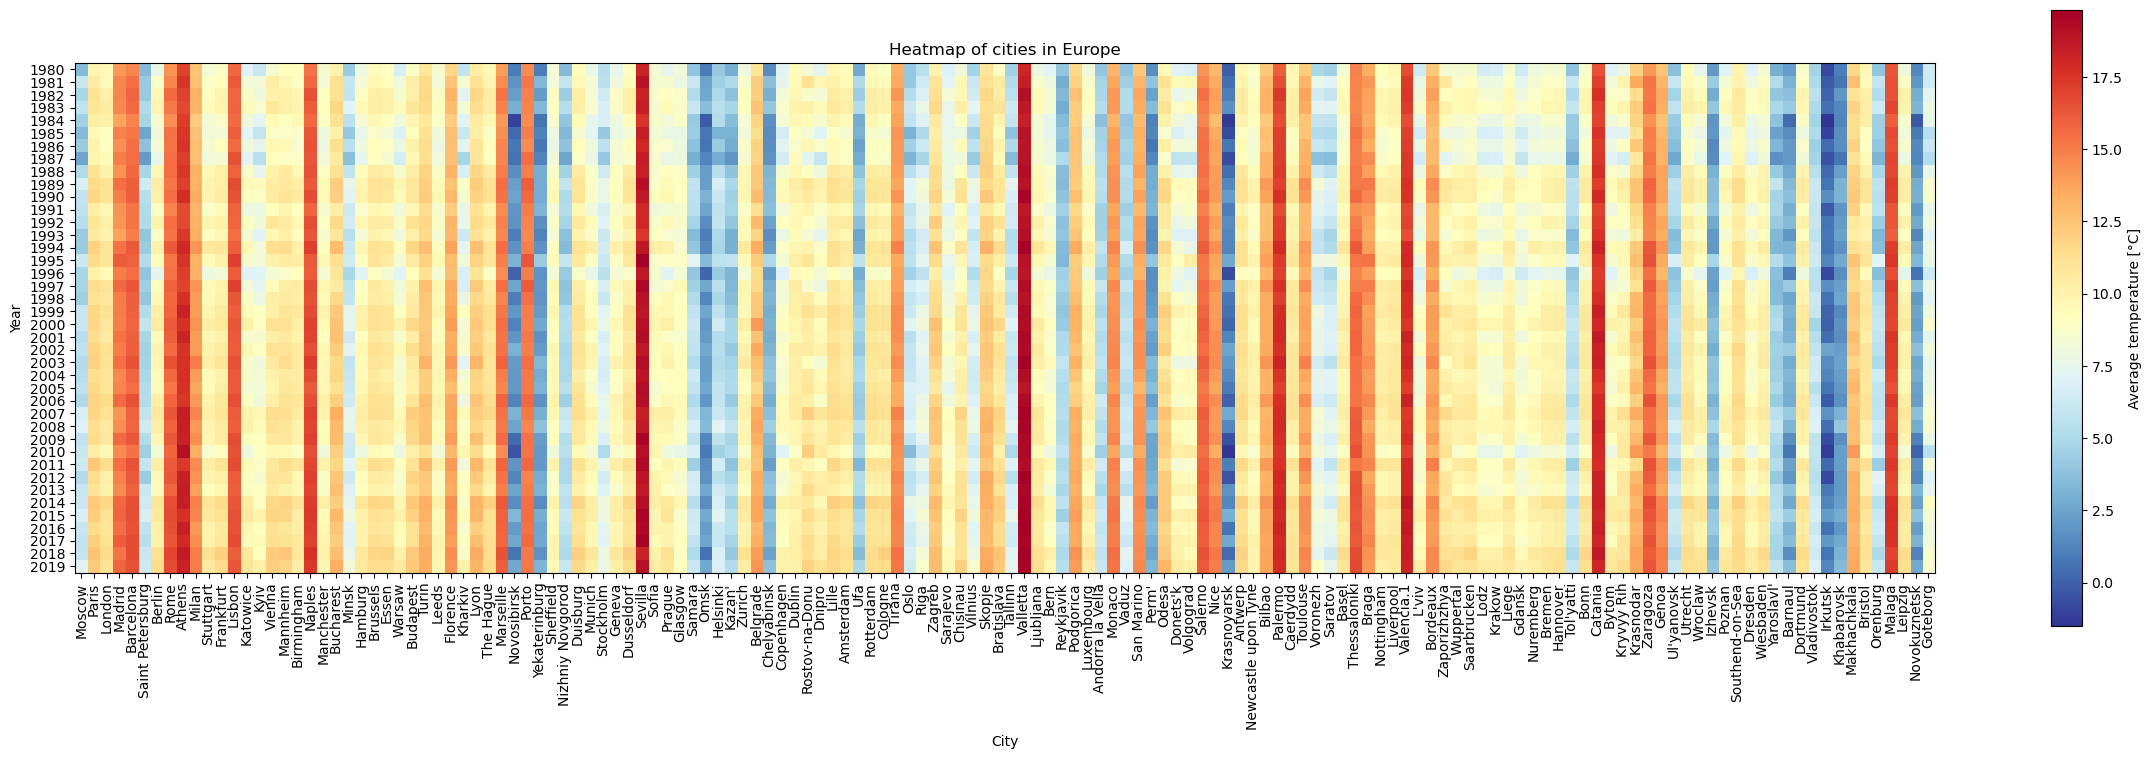

In [26]:
plot_heatmap(eu_yearly_mean, 'Europe')

In [ ]:
#no_2020 = eu_yearly_mean.iloc[:-1]
#eu_yearly_mean.drop(eu_yearly_mean.index[-1])

### Temperature difference <a class="anchor" id="sub_section_2_3_2"></a>

In [28]:
eu_delta = calculate_delta(eu_yearly_mean)
eu_delta.sort_values(by='delta', ascending=True)

,city,delta,abs_delta
35,Porto,0.608907,0.608907
12,Lisbon,0.614359,0.614359
56,Dublin,0.736907,0.736907
101,Braga,0.754780,0.754780
44,Sevilla,0.898760,0.898760
...,...,...,...
21,Minsk,3.943083,3.943083
70,Vilnius,3.958093,3.958093
110,Lodz,3.991286,3.991286
14,Kyiv,4.069687,4.069687


In [33]:
min_max(eu_delta)

City with the smallest change in temperature is Porto.
 Min absolute change in temperature: 0.61°C.
 Relative change in temperature: 0.61°C.
 City with the bigest change in temperature is Kharkiv.
 Max asolute change in temperature: 4.12°C.
 Relative change in temperature: 4.12°C.


## Asia <a class="anchor" id="section_2_4"></a>

ISO codes:

In [34]:
Asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'HKG', 'MAC', 'CYP', 'PRK', 'GEO', 'IND', 'IDN', 'IRN',
       'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'OMN', 'PAK', 'PHL',
       'QAT', 'KOR', 'SAU', 'SGP', 'LKA', 'PSE', 'SYR', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']

Extracting the continent:

In [37]:
asia = extract_continent(geo, Asia) 
asia.head()

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


date          datetime64[ns]
Tokyo                float64
Mumbai               float64
Delhi                float64
Shanghai             float64
                   ...      
Bilaspur             float64
Sargodha             float64
Tinnevelly           float64
Yangzhou             float64
Latakia              float64
Length: 477, dtype: object


,date,Tokyo,Mumbai,Delhi,Shanghai,Kolkata,Dhaka,Karachi,Osaka,Beijing,...,Kanazawa,Tabuk,Jiujiang,Hisar,Kashgar,Bilaspur,Sargodha,Tinnevelly,Yangzhou,Latakia
0,1980-01-01,4.16,23.40,13.74,9.10,20.47,18.07,16.79,5.25,-6.86,...,1.99,8.82,3.43,12.98,-6.18,22.14,11.54,24.05,3.71,11.68
1,1980-01-02,4.06,22.67,12.85,6.40,19.37,17.60,15.94,8.90,-5.82,...,5.58,10.31,3.22,11.32,-6.08,22.26,11.13,24.19,3.26,13.71
2,1980-01-03,7.12,22.30,10.50,5.43,18.71,18.63,15.68,12.15,-9.05,...,10.52,9.33,3.47,9.85,-6.76,21.09,10.28,24.39,2.17,13.00
3,1980-01-04,9.23,23.40,10.87,2.29,18.76,18.59,15.49,8.92,-11.20,...,4.89,10.03,1.96,10.28,-7.67,20.39,10.98,24.12,-0.95,12.67
4,1980-01-05,3.20,23.98,11.03,2.40,18.62,18.22,15.51,4.14,-8.88,...,0.19,9.41,4.35,10.64,-6.89,19.51,11.27,23.86,-0.66,10.09


Calculating the average yearly temperature:

In [39]:
asia_yearly_mean = yearly_mean(asia)

### Heatmap  <a class="anchor" id="sub_section_2_4_1"></a>

In [41]:
#plot_heatmap(asia_yearly_mean, 'Asia')

Because Asian dataset is quite large, the heatmap is crowded and useless. This is why we will show some plots of subsets, as an example.

#### Asian cities starting with A <a class="anchor" id="subsub_section_2_4_1_1"></a>

In [43]:
asia_A = asia_yearly_mean.loc[:,asia_yearly_mean.columns.str.startswith('A')]

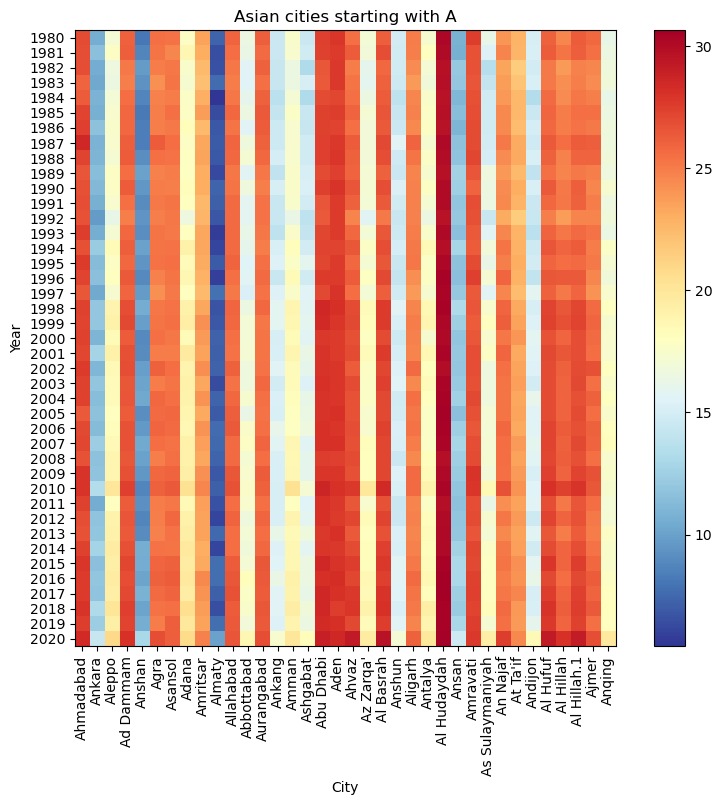

In [45]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.imshow(asia_yearly_mean.loc[:,asia_yearly_mean.columns.str.startswith('A')], cmap = 'RdYlBu_r')
plt.colorbar()
ax.set_xticks(range(len(asia_A.columns)))
ax.set_xticklabels(asia_A.columns, rotation=90)
ax.set_yticks(range(len(list(range(1980, 2021,1)))))
ax.set_yticklabels(list(range(1980, 2021,1)))
plt.xlabel('City')
plt.ylabel('Year')
plt.title('Asian cities starting with A')
plt.show()

#### Coldest cities (<10°C) <a class="anchor" id="subsub_section_2_4_1_2"></a>

In [47]:
asia_bellow_10 = asia_yearly_mean.loc[:,[(asia_yearly_mean[col].mean() < 10) for col in asia_yearly_mean.columns]] #column mean below 10°C

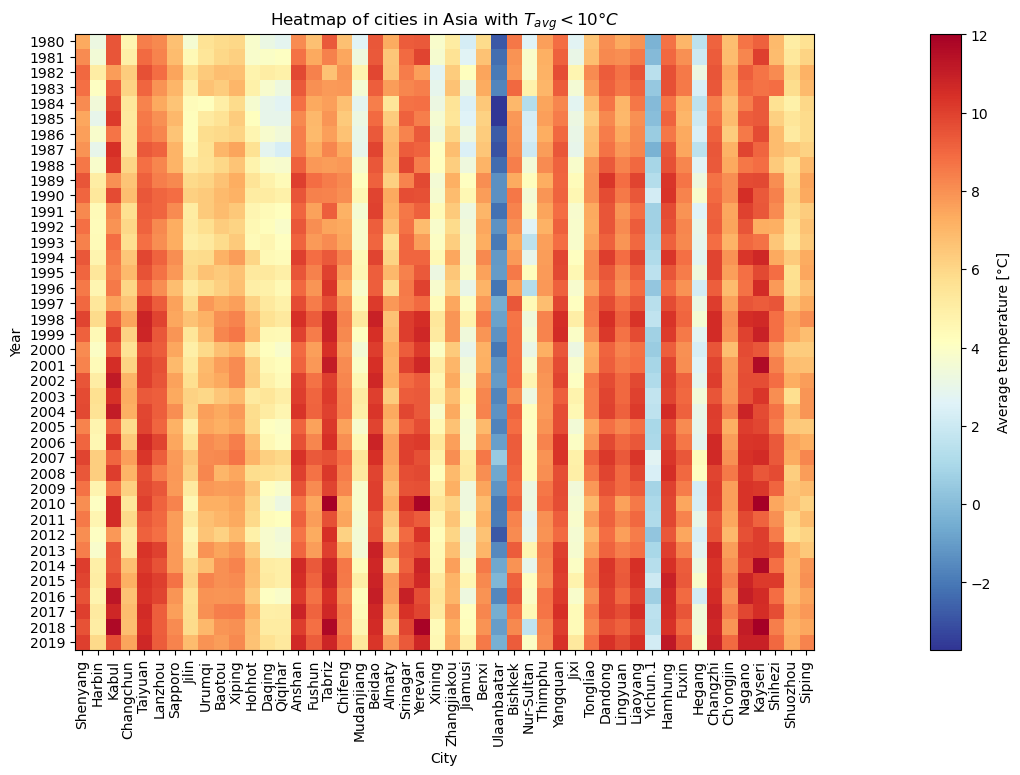

In [48]:
plot_heatmap(asia_bellow_10, 'Asia with $T_{avg}<10°C$')

#### Hottest cities (>27°C) <a class="anchor" id="subsub_section_2_4_1_3"></a>

In [49]:
asia_above_27 = asia_yearly_mean.loc[:,[(asia_yearly_mean[col].mean() > 27) for col in asia_yearly_mean.columns]] #column mean below 10°C

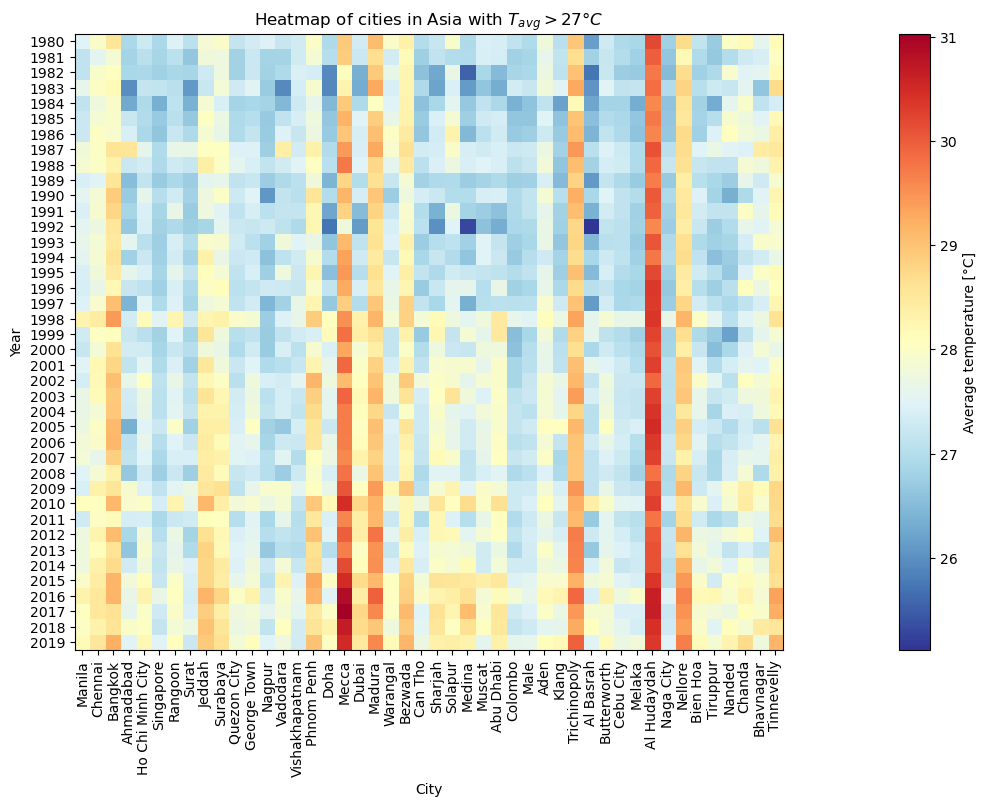

In [50]:
plot_heatmap(asia_above_27, 'Asia with $T_{avg}>27°C$')

### Temperature difference <a class="anchor" id="sub_section_2_4_2"></a>

In [51]:
asia_delta = calculate_delta(asia_yearly_mean)
asia_delta

,city,delta,abs_delta
0,Tokyo,1.900262,1.900262
1,Mumbai,0.245219,0.245219
2,Delhi,-0.218618,0.218618
3,Shanghai,2.239702,2.239702
4,Kolkata,0.387041,0.387041
...,...,...,...
471,Bilaspur,-0.165760,0.165760
472,Sargodha,-0.513284,0.513284
473,Tinnevelly,1.004833,1.004833
474,Yangzhou,2.303365,2.303365


In [52]:
min_max(asia_delta)

City with the smallest change in temperature is Malegaon.
 Min absolute change in temperature: 0.0°C.
 Relative change in temperature: -0.0°C.
 City with the bigest change in temperature is Jilin.
 Max asolute change in temperature: 3.17°C.
 Relative change in temperature: 3.17°C.


## Africa <a class="anchor" id="section_2_5"></a>

ISO codes:

In [53]:
Africa = ['DZA', 'AGO', 'BEN', 'BWA', 'IOT', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'CIV', 'COD', 'DJI', 'EGY', 'GNQ', 
         'ERI', 'SWZ', 'ETH', 'ATF', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS',
         'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'REU', 'RWA', 'SHN', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TGO',
         'TUN', 'UGA', 'TZA', 'ESH', 'ZMB', 'ZWE']


Extracting the continent:

In [58]:
africa = extract_continent(geo, Africa) 
africa.head()

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


date         datetime64[ns]
Cairo               float64
Lagos               float64
Kinshasa            float64
Luanda              float64
                  ...      
Kisangani           float64
Bouake              float64
Uyo                 float64
Kenitra             float64
Matola              float64
Length: 120, dtype: object


,date,Cairo,Lagos,Kinshasa,Luanda,Khartoum,Alexandria,Abidjan,Johannesburg,Algiers,...,Constantine,Suhaj,Al Mansurah,Abeokuta,Blantyre,Kisangani,Bouake,Uyo,Kenitra,Matola
0,1980-01-01,13.22,27.07,25.09,25.01,21.16,14.98,25.57,22.80,14.42,...,6.98,11.62,13.73,26.57,23.36,24.95,25.40,26.67,13.96,28.59
1,1980-01-02,13.55,26.86,24.35,25.29,21.40,15.09,25.82,23.90,13.88,...,9.08,12.29,13.65,26.55,23.61,25.34,26.54,26.81,13.79,26.28
2,1980-01-03,12.72,26.89,24.41,25.28,22.18,14.09,26.85,23.47,9.37,...,4.60,12.90,13.02,26.09,24.70,24.87,25.82,26.00,12.66,28.80
3,1980-01-04,13.26,26.85,24.71,25.69,22.73,14.31,26.31,21.79,9.19,...,4.69,12.69,13.56,26.89,24.79,23.53,25.88,25.90,12.12,32.03
4,1980-01-05,11.09,26.81,25.09,25.72,22.18,11.58,26.28,21.16,11.43,...,6.14,11.03,10.94,27.06,24.81,24.05,25.76,25.83,12.39,28.67


### Heatmap <a class="anchor" id="sub_section_2_5_1"></a>

Calculating the average and plotting the heatmap:

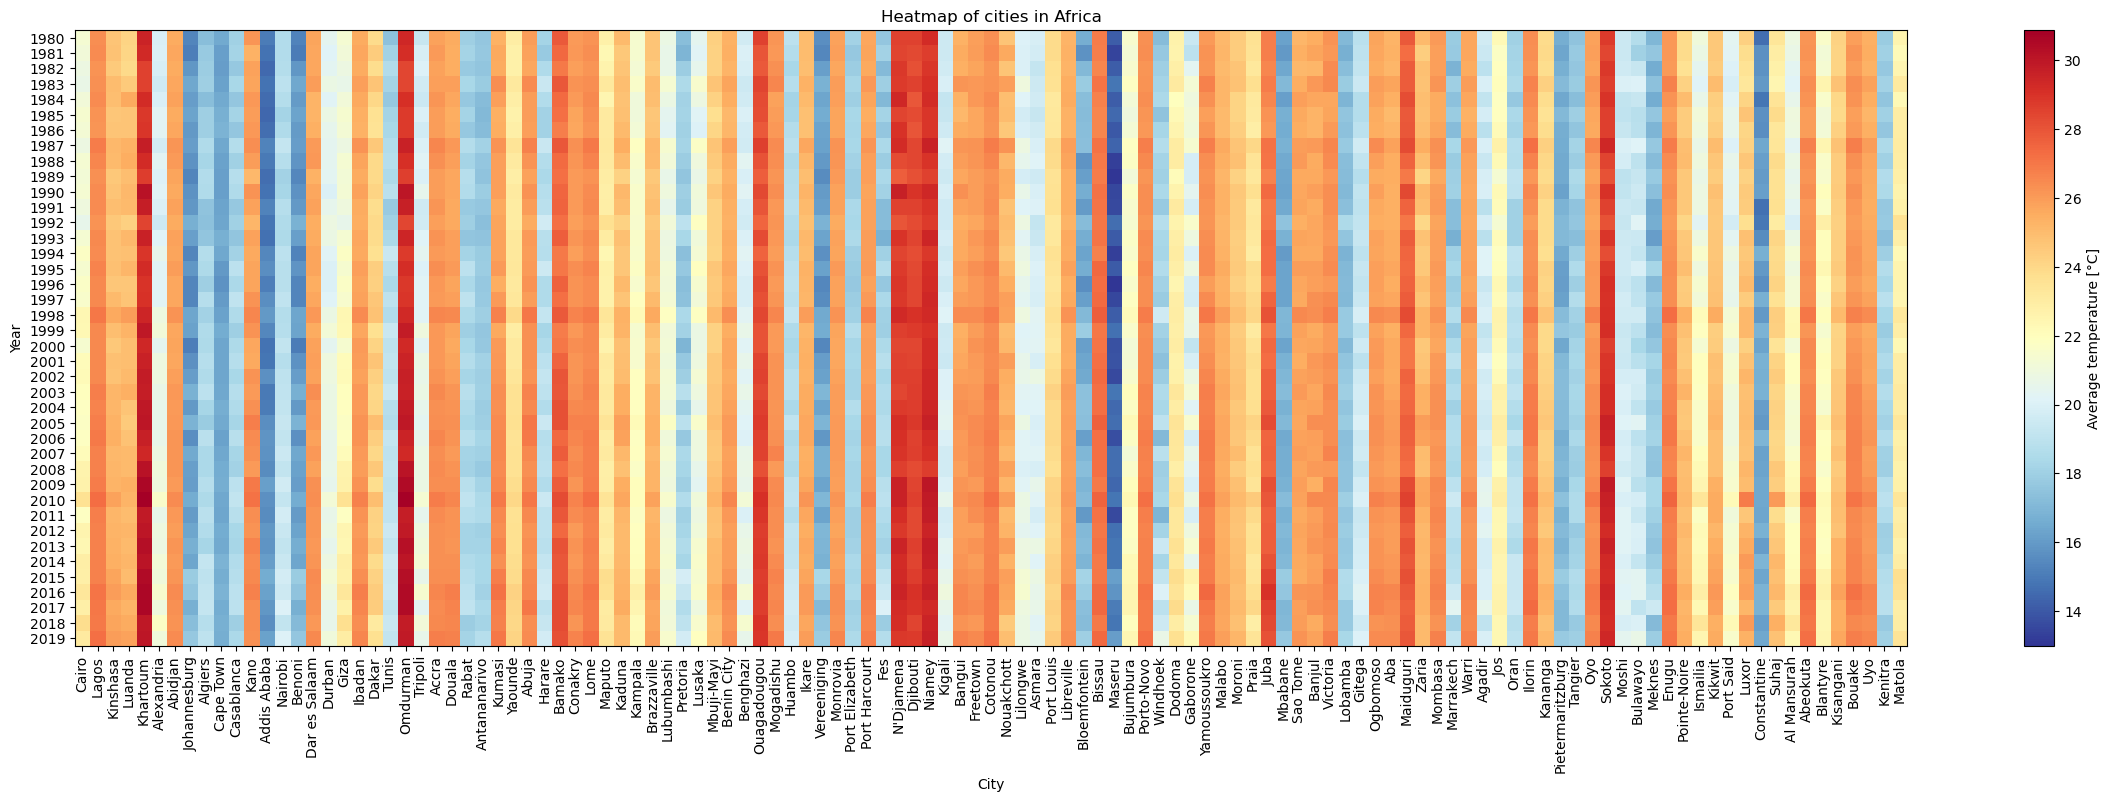

In [55]:
africa_yearly_mean = yearly_mean(africa)
plot_heatmap(africa_yearly_mean, 'Africa')

### Temperature difference <a class="anchor" id="sub_section_2_5_2"></a>

In [59]:
africa_delta = calculate_delta(africa_yearly_mean)
min_max(africa_delta)

City with the smallest change in temperature is Zaria.
 Min absolute change in temperature: 0.0°C.
 Relative change in temperature: 0.0°C.
 City with the bigest change in temperature is Windhoek.
 Max asolute change in temperature: 3.49°C.
 Relative change in temperature: 3.49°C.


## North America <a class="anchor" id="section_2_6"></a>

ISO codes and extracting the continent:

In [62]:
North_america = ['AIA', 'ATG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BMU', 'BES', 'VGB', 'CAN', 'CYM', 'CRI', 'CUB', 'CUW', 'DMA', 'DOM',
                'SLV', 'GRL', 'GRD', 'GLP', 'GTM', 'HTI', 'HND', 'JAM', 'MTQ', 'MEX', 'MSR', 'NIC', 'PAN', 'PRI', 'BLM', 'KNA',
                'LCA', 'MAF', 'SPM', 'VCT', 'SXM', 'TTO', 'TCA', 'USA', 'VIR']


In [63]:
north_am = extract_continent(geo, North_america) 
north_am.head()

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


date                 datetime64[ns]
New York                    float64
Mexico City                 float64
Los Angeles                 float64
Chicago                     float64
                          ...      
Columbia                    float64
Akron                       float64
Santiago de Cuba            float64
Cancun                      float64
Heroica Matamoros           float64
Length: 146, dtype: object


,date,New York,Mexico City,Los Angeles,Chicago,Miami,Dallas,Philadelphia,Houston,Washington,...,Veracruz,Quetzaltenango,Bakersfield,Ogden,New Haven,Columbia,Akron,Santiago de Cuba,Cancun,Heroica Matamoros
0,1980-01-01,1.48,11.35,14.24,-0.61,14.05,8.61,1.16,9.14,1.24,...,20.82,14.83,11.86,-1.62,1.34,5.12,-2.60,22.19,21.21,17.67
1,1980-01-02,1.00,10.01,13.77,-0.13,16.79,7.27,1.45,12.89,1.92,...,21.49,15.39,9.54,-2.21,0.04,4.82,-1.86,22.43,23.29,17.70
2,1980-01-03,-3.23,9.67,12.08,-1.51,20.98,1.20,-3.32,6.60,-0.28,...,20.62,15.35,8.77,-0.24,-3.81,3.76,-4.68,23.31,24.04,11.19
3,1980-01-04,-1.81,10.12,11.19,-2.03,17.57,2.69,-2.84,6.28,-1.75,...,20.06,15.52,8.27,1.61,-1.78,4.28,-3.21,23.08,21.49,14.22
4,1980-01-05,-4.31,10.81,12.78,-1.93,13.33,9.56,-4.72,12.39,-3.47,...,20.84,15.22,11.64,-1.23,-3.83,1.39,-6.64,21.88,21.20,18.30


### Heatmap <a class="anchor" id="sub_section_2_6_1"></a>

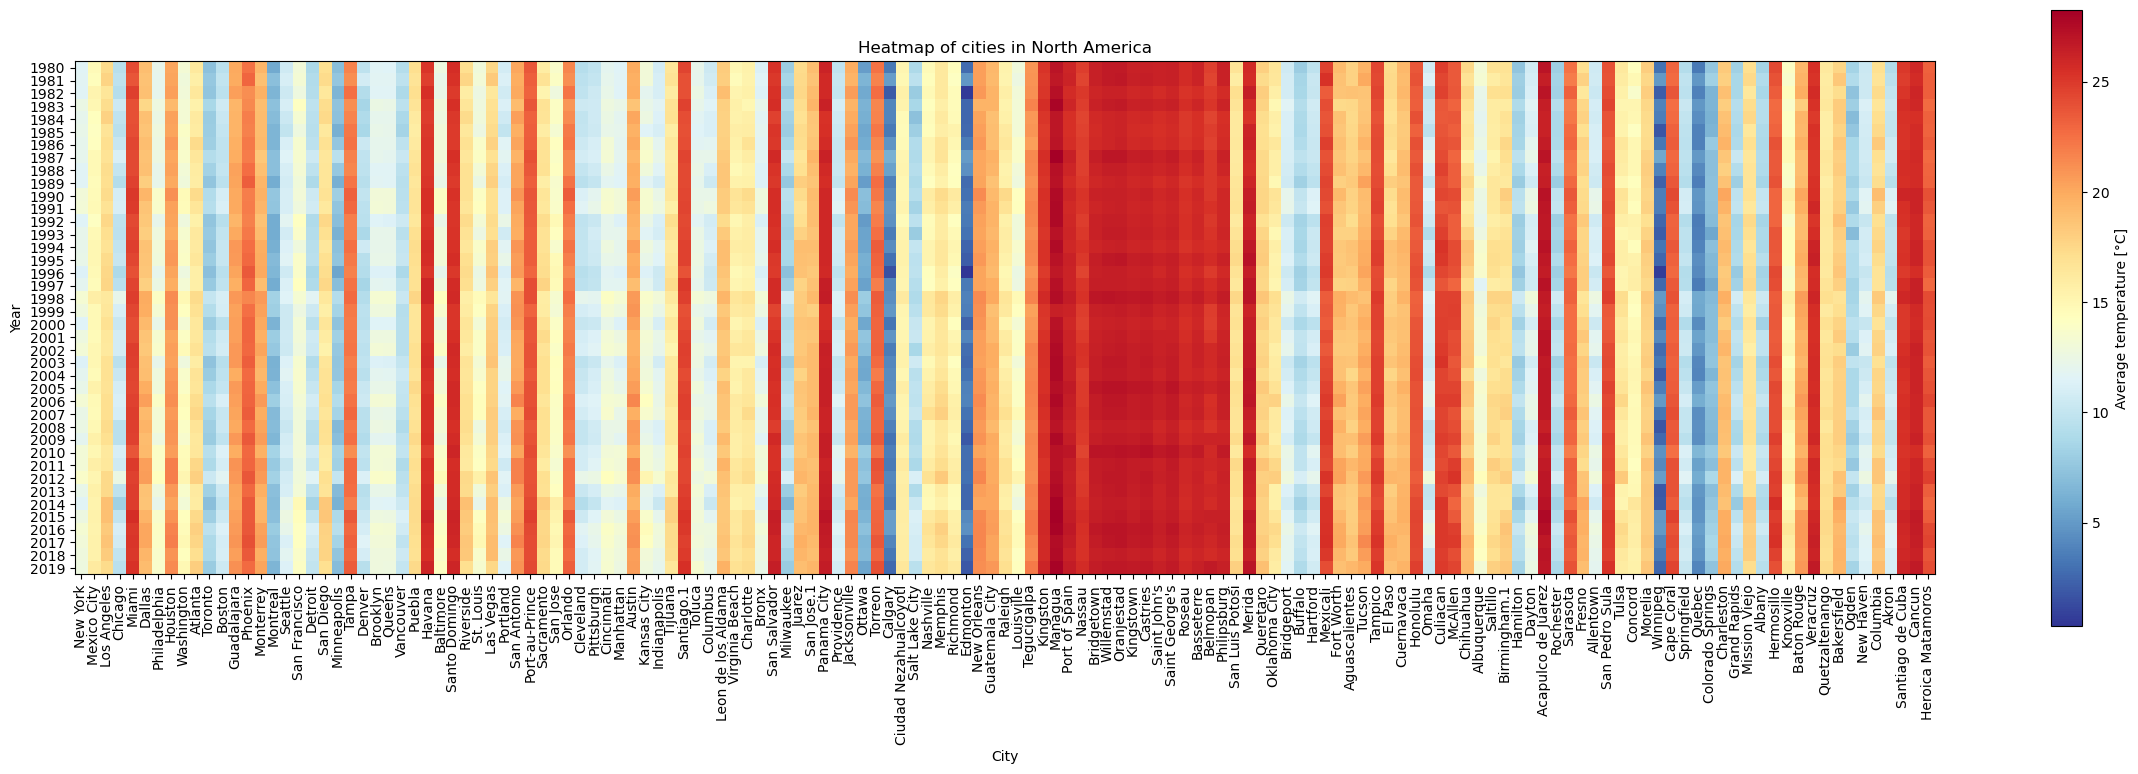

In [64]:
north_am_yearly_mean = yearly_mean(north_am)
plot_heatmap(north_am_yearly_mean, 'North America')

### Temperature difference <a class="anchor" id="sub_section_2_6_2"></a>

In [65]:
north_am_delta = calculate_delta(north_am_yearly_mean)
min_max(north_am_delta)

City with the smallest change in temperature is Las Vegas.
 Min absolute change in temperature: 0.02°C.
 Relative change in temperature: 0.02°C.
 City with the bigest change in temperature is Knoxville.
 Max asolute change in temperature: 2.34°C.
 Relative change in temperature: 2.34°C.


## South America <a class="anchor" id="section_2_7"></a>

ISO codes and extracting the continent:

In [66]:
South_america = ['ARG', 'BOL', 'BVT', 'BRA', 'CHL', 'COL', 'ECU', 'FLK', 'GUF', 'GUY', 'PRY', 'PER', 'SGS', 'SUR', 'URY', 'VEN']

In [67]:
south_am = extract_continent(geo, South_america) 
south_am.head()

C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


date              datetime64[ns]
Sao Paulo                float64
Buenos Aires             float64
Rio de Janeiro           float64
Lima                     float64
                       ...      
Uberlandia               float64
Sorocaba                 float64
Mar del Plata            float64
Ribeirao Preto           float64
Puerto La Cruz           float64
Length: 83, dtype: object


,date,Sao Paulo,Buenos Aires,Rio de Janeiro,Lima,Bogota,Santiago,Belo Horizonte,Porto Alegre,Brasilia,...,Santo Andre,Barcelona.1,Canoas,Chiclayo,Pereira,Uberlandia,Sorocaba,Mar del Plata,Ribeirao Preto,Puerto La Cruz
0,1980-01-01,17.86,21.48,22.07,20.77,13.80,20.37,20.55,20.11,20.26,...,17.85,25.91,20.02,23.41,17.45,20.81,19.38,19.29,21.38,25.75
1,1980-01-02,18.65,23.03,22.78,20.99,13.63,19.45,20.34,21.42,21.11,...,18.66,26.01,21.09,24.29,17.43,21.90,20.54,17.96,22.55,25.81
2,1980-01-03,18.42,22.06,23.24,20.88,13.60,17.03,21.36,23.12,22.72,...,18.45,25.81,22.87,24.02,17.94,23.02,20.43,17.00,23.60,25.72
3,1980-01-04,19.21,23.38,23.33,20.91,13.02,19.09,21.13,23.59,22.42,...,19.13,26.24,23.25,23.88,16.82,24.26,21.20,18.89,24.43,26.00
4,1980-01-05,21.34,22.85,24.06,20.50,13.87,21.42,21.32,24.88,22.01,...,21.21,26.13,24.88,23.63,17.80,23.77,22.92,19.75,24.76,25.87


### Heatmap <a class="anchor" id="sub_section_2_7_1"></a>

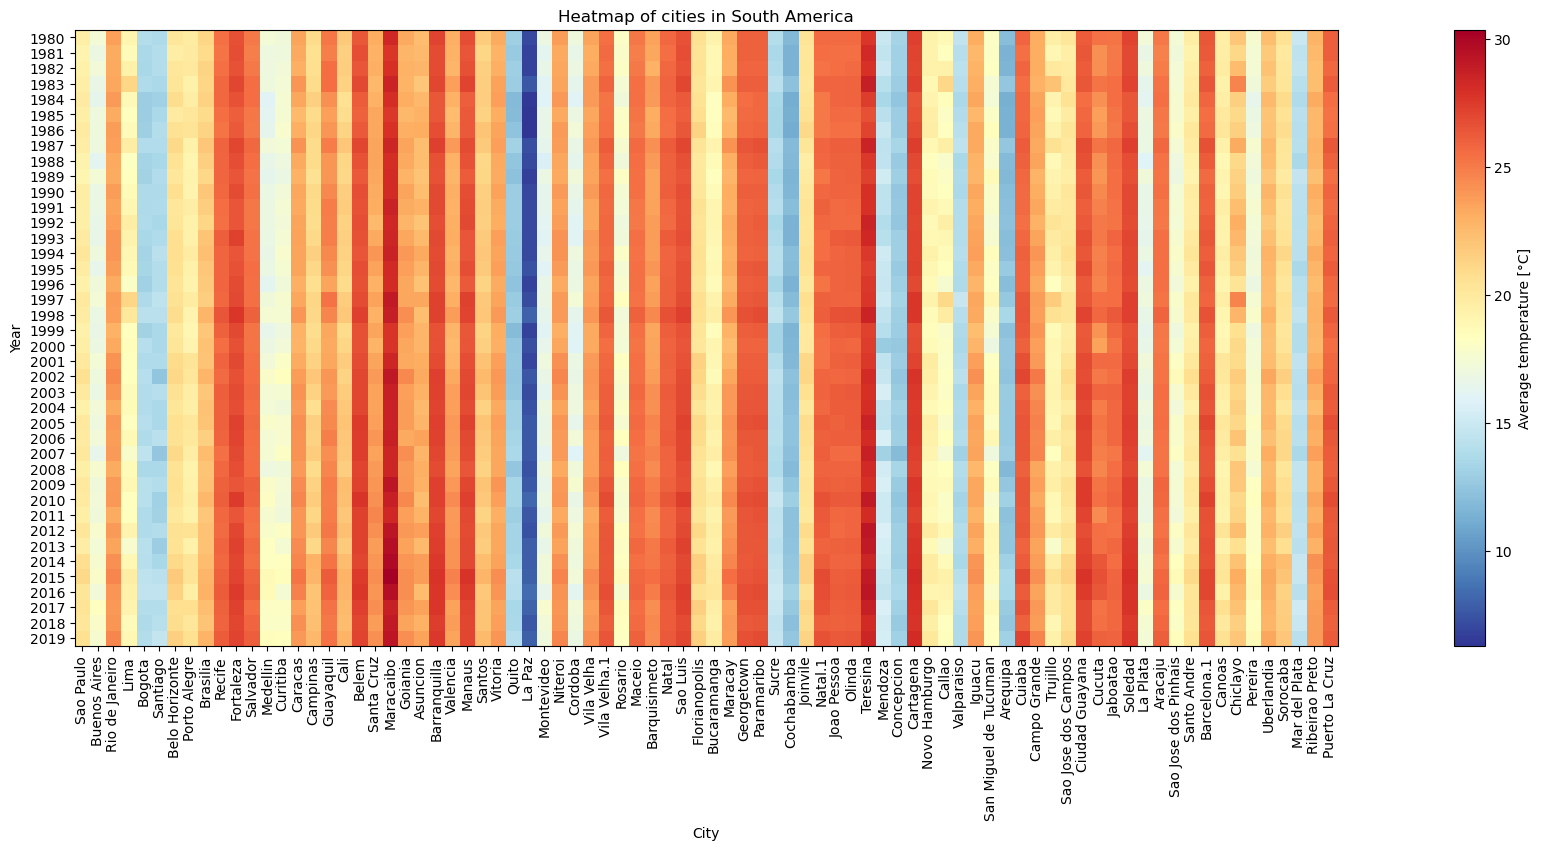

In [68]:
south_am_yearly_mean = yearly_mean(south_am)
plot_heatmap(south_am_yearly_mean, 'South America')

### Temperature difference <a class="anchor" id="sub_section_2_7_2"></a>

In [69]:
south_am_delta = calculate_delta(south_am_yearly_mean)
min_max(south_am_delta)

City with the smallest change in temperature is Chiclayo.
 Min absolute change in temperature: 0.0°C.
 Relative change in temperature: 0.0°C.
 City with the bigest change in temperature is Campo Grande.
 Max asolute change in temperature: 1.66°C.
 Relative change in temperature: 1.66°C.


## Oceania <a class="anchor" id="section_2_8"></a>

ISO codes and extracting the continent:

In [70]:
Oceania = ['ASM', 'AUS', 'CXR', 'CCK', 'COK', 'FJI', 'PYF', 'GUM', 'HMD', 'KIR', 'MHL', 'FSM', 'NRU', 'NCL', 'NZL', 'NIU', 'NFK',
          'MNP', 'PLW', 'PNG', 'PCN', 'WSM', 'SLB', 'TKL', 'TON', 'TUV', 'UMI', 'VUT', 'WLF']

In [71]:
oceania = extract_continent(geo, Oceania)

date            datetime64[ns]
Sydney                 float64
Melbourne              float64
Brisbane               float64
Perth                  float64
Auckland               float64
Adelaide               float64
Newcastle              float64
Wellington             float64
Canberra               float64
Port Moresby           float64
Suva                   float64
Honiara                float64
Apia                   float64
Port-Vila              float64
Nuku`alofa             float64
Tarawa                 float64
Majuro                 float64
Pago Pago              float64
Funafuti               float64
Palikir                float64
Capitol Hill           float64
Hagta                  float64
Ngerulmud              float64
dtype: object


C:\Users\Nejla\AppData\Local\Temp\ipykernel_15548\4228726114.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  continent.loc[:,continent.columns != 'date'] = continent.loc[:,continent.columns != 'date'].astype('float')


### Heatmap <a class="anchor" id="sub_section_2_8_1"></a>

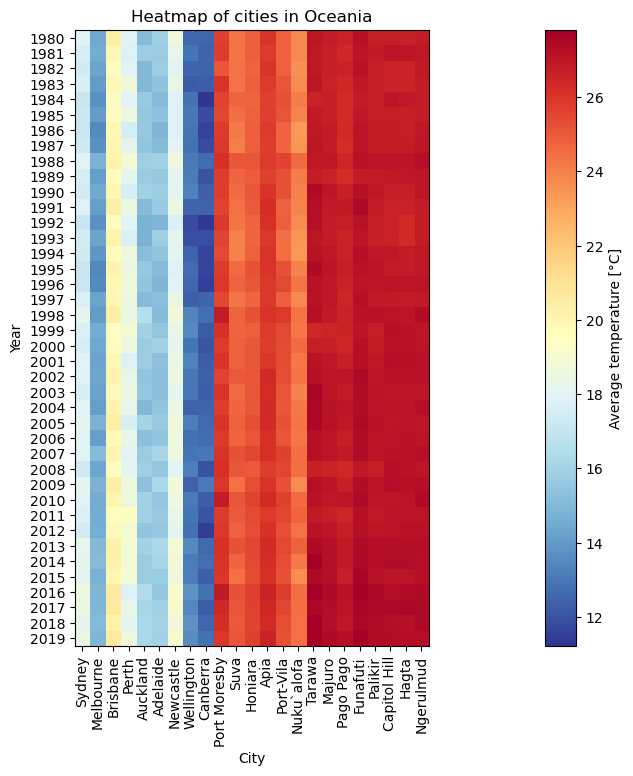

In [72]:
oceania_yearly_mean = yearly_mean(oceania)
plot_heatmap(oceania_yearly_mean, 'Oceania')

### Temperature difference <a class="anchor" id="sub_section_2_8_2"></a>

In [73]:
oceania_delta = calculate_delta(oceania_yearly_mean)
min_max(oceania_delta)

City with the smallest change in temperature is Adelaide.
 Min absolute change in temperature: 0.13°C.
 Relative change in temperature: 0.13°C.
 City with the bigest change in temperature is Wellington.
 Max asolute change in temperature: 1.03°C.
 Relative change in temperature: 1.03°C.


## Antarctica <a class="anchor" id="section_2_9"></a>

In [74]:
Antarctica = ['ATA']

In [75]:
antarctica = extract_continent(geo, Antarctica)
antarctica.head()

date    datetime64[ns]
dtype: object


,date
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05


There are no cities in Antarctica.

## Plotting the biggest and smallest temperature difference for every continent <a class="anchor" id="section_2_10"></a>

In [76]:
def get_index(continent_delta):
    min_index = continent_delta['abs_delta'].idxmin()
    max_index = continent_delta['abs_delta'].idxmax()
    return [min_index, max_index]

eu_index = get_index(eu_delta)
asia_index = get_index(asia_delta)
africa_index = get_index(africa_delta)
north_am_index = get_index(north_am_delta)
south_am_index = get_index(south_am_delta)
oceania_index = get_index(oceania_delta)

min_temps = [eu_delta.iloc[eu_index[0]][2], asia_delta.iloc[asia_index[0]][2], africa_delta.iloc[africa_index[0]][2], north_am_delta.iloc[north_am_index[0]][2], south_am_delta.iloc[south_am_index[0]][2], oceania_delta.iloc[oceania_index[0]][2],]
max_temps = [eu_delta.iloc[eu_index[1]][2], asia_delta.iloc[asia_index[1]][2], africa_delta.iloc[africa_index[1]][2], north_am_delta.iloc[north_am_index[1]][2], south_am_delta.iloc[south_am_index[1]][2], oceania_delta.iloc[oceania_index[1]][2],]

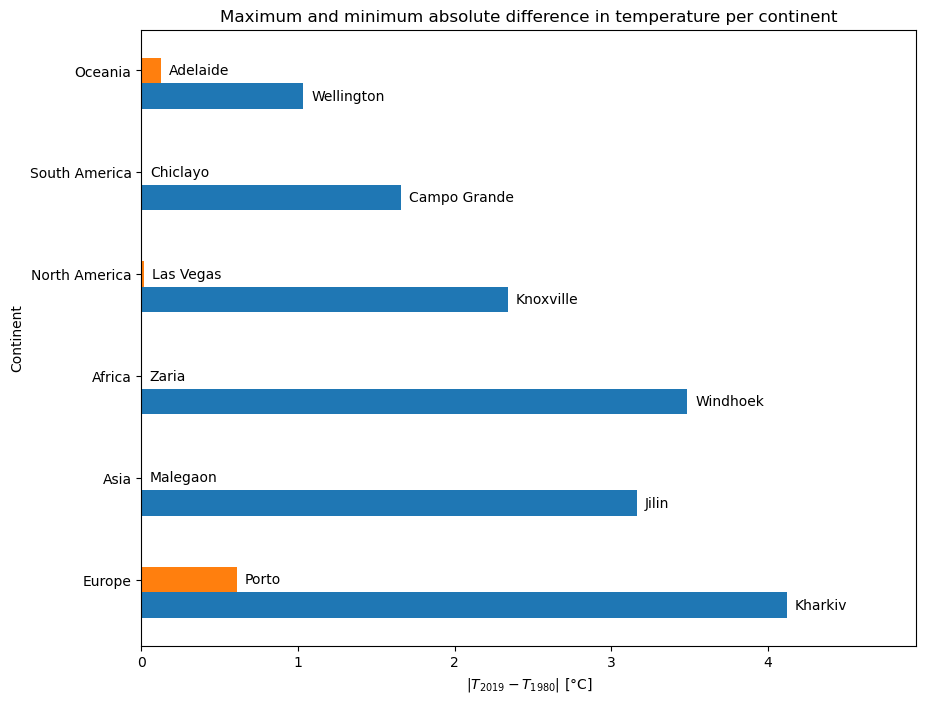

In [77]:
continents = ('Europe', 'Asia', 'Africa', 'North America', 'South America', 'Oceania')
max_min_temp = {
    'max change in temp': (max_temps[0], max_temps[1], max_temps[2], max_temps[3], max_temps[4], max_temps[5]),
    'min change in temp': (min_temps[0], min_temps[1], min_temps[2], min_temps[3], min_temps[4], min_temps[5]),
}


plt.rcParams.update({'axes.xmargin': 0.2})

y = np.arange(len(continents)) #label locations
width = 0.25 #width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,8))

for attribute, measurement in max_min_temp.items():
    offset = width*multiplier
    rects = ax.barh(y+offset, measurement, width, label = attribute)
    multiplier += 1
    
ax.set_yticks(y + width, continents)
plt.annotate(eu_delta.iloc[eu_index[1]][0], xy=(max_temps[0]+0.05,0.25*0), horizontalalignment='left', verticalalignment='center')
plt.annotate(eu_delta.iloc[eu_index[0]][0], xy=(min_temps[0]+0.05,0.25*1), horizontalalignment='left', verticalalignment='center')
plt.annotate(asia_delta.iloc[asia_index[1]][0], xy=(max_temps[1]+0.05, 0.25*4), horizontalalignment='left', verticalalignment='center')
plt.annotate(asia_delta.iloc[asia_index[0]][0], xy=(min_temps[1]+0.05, 0.25*5), horizontalalignment='left', verticalalignment='center')
plt.annotate(africa_delta.iloc[africa_index[1]][0], xy=(max_temps[2]+0.05, 0.25*8), horizontalalignment='left', verticalalignment='center')
plt.annotate(africa_delta.iloc[africa_index[0]][0], xy=(min_temps[2]+0.05, 0.25*9), horizontalalignment='left', verticalalignment='center')
plt.annotate(north_am_delta.iloc[north_am_index[1]][0], xy=(max_temps[3]+0.05, 0.25*12), horizontalalignment='left', verticalalignment='center')
plt.annotate(north_am_delta.iloc[north_am_index[0]][0], xy=(min_temps[3]+0.05, 0.25*13), horizontalalignment='left', verticalalignment='center')
plt.annotate(south_am_delta.iloc[south_am_index[1]][0], xy=(max_temps[4]+0.05, 0.25*16), horizontalalignment='left', verticalalignment='center')
plt.annotate(south_am_delta.iloc[south_am_index[0]][0], xy=(min_temps[4]+0.05, 0.25*17), horizontalalignment='left', verticalalignment='center')
plt.annotate(oceania_delta.iloc[oceania_index[1]][0], xy=(max_temps[5]+0.05, 0.25*20), horizontalalignment='left', verticalalignment='center')
plt.annotate(oceania_delta.iloc[oceania_index[0]][0], xy=(min_temps[5]+0.05, 0.25*21), horizontalalignment='left', verticalalignment='center')
plt.xlabel('$|T_{2019}-T_{1980}|$ [°C]')
plt.ylabel('Continent')
plt.title('Maximum and minimum absolute difference in temperature per continent')

plt.show()

Continent with cities that suffered the largest temperature difference is Europe.\
Continent with cities with the smallest absolute temperature difference is Oceania.